### Import dos Pacotes

In [27]:
# pre-processamento e pacotes básicos
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import math

# clustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors

# preparação de dados para ml e avaliação de modelos
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, mean_squared_error
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# classificadores
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# regressores
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

### Import e Análises e Tratamentos Iniciais dos Dados

- Vamos primeiramente fazer o import dos dados do exercício em um dataframe:

In [2]:
df = pd.read_csv('TrabalhoEx8.csv', sep=';')

- Em seguida, vamos analisar os principais aspectos do dataframe:

In [3]:
# visualizando a quantidade de registros e colunas:
df.shape

(20640, 10)

In [4]:
# visualizando os nomes das colunas
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10'], dtype='object')

- Como na descrição do exercício, os dados estão com as colunas anonimizadas. Vamos visualizar as primeiras linhas do df:

In [5]:
# visualizando as primeiras linhas:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,-122.23,452600.0,129.0,41.0,880.0,D,126.0,322.0,83.252,37.88
1,-122.22,358500.0,1106.0,21.0,7099.0,D,1138.0,2401.0,83.014,37.86
2,-122.24,352100.0,190.0,52.0,1467.0,D,177.0,496.0,72.574,37.85
3,-122.25,341300.0,235.0,52.0,1274.0,D,219.0,558.0,56.431,37.85
4,-122.25,342200.0,280.0,52.0,1627.0,D,259.0,565.0,38.462,37.85


- Aparentemnte temos dados numéricos contínuos para todas as variáveis, exceto a V6, que aparenta ser categórica. Vamos analisar um pouco mais o tipo dos dados:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
V1     20640 non-null float64
V2     20640 non-null float64
V3     20433 non-null float64
V4     20640 non-null float64
V5     20640 non-null float64
V6     20640 non-null object
V7     20640 non-null float64
V8     20640 non-null float64
V9     20640 non-null float64
V10    20640 non-null float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- Vemos que, de fato, todos os dados são do tipo ponto flutuante, exceto a coluna V6, que contém objeto. 
- Também já observamos que a coluna **V3 tem dados faltantes**. Vamos, tratar estes dados faltantes a seguir. Como são cerca de 200 casos, dentre um total de mais de 20k (cerca de 1%), optamos por **excluir estes dados**.

In [7]:
# excluindo dados faltante
df.dropna(inplace=True)

- Analisando os dados categóricos da coluna V6, temos:

In [8]:
dfV6 = df['V6']
dfV6.value_counts()

A    9034
B    6496
E    2628
D    2270
C       5
Name: V6, dtype: int64

In [9]:
dfV6.shape

(20433,)

- Vamos em seguida analisar as principais estatísticas dos dados numéricos:

In [10]:
df.describe()

,V1,V2,V3,V4,V5,V7,V8,V9,V10
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,206864.413155,537.870553,28.633094,2636.504233,499.433465,1424.946949,33.660475,35.633221
std,2.003578,115435.667099,421.385070,12.591805,2185.269567,382.299226,1133.208490,21.859628,2.136348
min,-124.350000,14999.000000,1.000000,1.000000,2.000000,1.000000,3.000000,0.499900,32.540000
25%,-121.800000,119500.000000,296.000000,18.000000,1450.000000,280.000000,787.000000,19.961000,33.930000
50%,-118.490000,179700.000000,435.000000,29.000000,2127.000000,409.000000,1166.000000,31.875000,34.260000
75%,-118.010000,264700.000000,647.000000,37.000000,3143.000000,604.000000,1722.000000,45.208000,37.720000
max,-114.310000,500001.000000,6445.000000,52.000000,39320.000000,6082.000000,35682.000000,150.001000,41.950000


Neste ponto, observamos que:
- Os dados apresentam escalas variadas, e portanto necessitarão de tratamento para deixá-los em uma mesma escala.
- Vamos analisar o **boxplot** dos dados para entender melhor a distribuição:

-------- Visualizando os dados: V1 --------


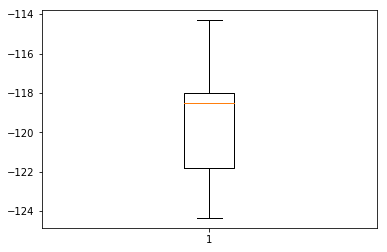

-------- Visualizando os dados: V2 --------


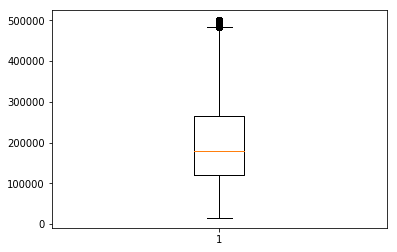

-------- Visualizando os dados: V3 --------


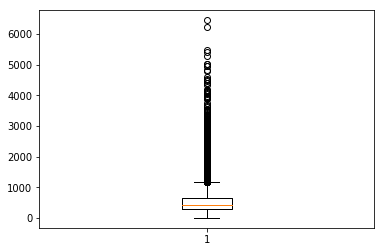

-------- Visualizando os dados: V4 --------


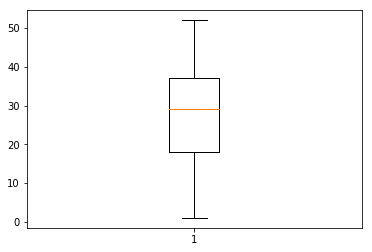

-------- Visualizando os dados: V5 --------


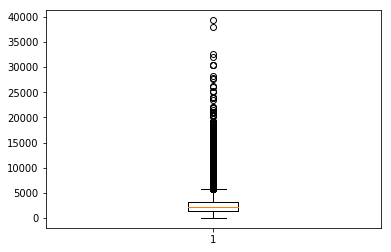

-------- Visualizando os dados: V7 --------


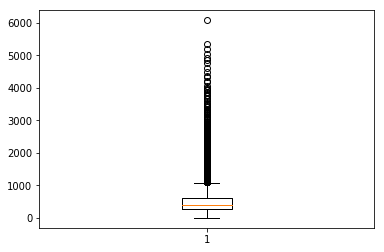

-------- Visualizando os dados: V8 --------


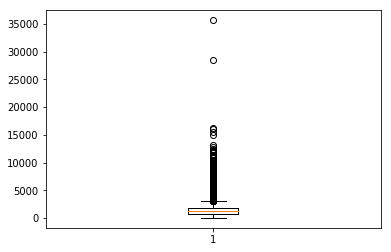

-------- Visualizando os dados: V9 --------


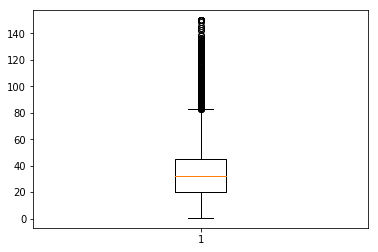

-------- Visualizando os dados: V10 --------


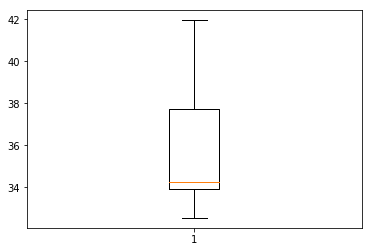

In [11]:
colunas_numericas = ['V1','V2','V3','V4','V5','V7','V8','V9','V10',]
for numcol in colunas_numericas:
    print('-------- Visualizando os dados: {} --------'.format(numcol))
    plt.boxplot(df[numcol])
    plt.show();
    
plt.close()

- De fato, observamos que as variáveis citadas, além da V9, apresentam distribuições desbalanceadas dos dados. Por este motivo, vamos aplicar a normalização nos dados para deixá-los em uma mesma escala:

In [12]:
# vamos manter os dados originais da variável 'V2' armazenadas sem transformação, 
# para ser utilizada no regressor
V2_orig = df['V2'].copy()

# instanciando o transformador
scaler = MinMaxScaler()

# fazendo a transformação para as colunas numéricas
for numcol in colunas_numericas:
    df[numcol] = scaler.fit_transform(df[[numcol]])

- Por fim, vamos tratar as variáveis categóricas, fazendo a transformação para variáveis *dummy*:

In [13]:
df = pd.get_dummies(df, drop_first=True)

### Visualizando os dados

- Vamos tentar visualizar os dados, para ver se é possível notar algum padrão no cunjunto. Como temos muitas dimensões vamos usar o PCA para reduzir para 2, e imiprimir com um scatterplot.

In [14]:
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df), columns=['PC1','PC2'])

- É esperado que haja perda de informação no processe de transformação via PCA. Vamos entender, abaixo, quanto cada componente explica da variância original:

In [15]:
print(pca.explained_variance_ratio_)

[0.39423066 0.21735552]


- Temos cerca de 60% da variância original explicada nos dois componentes. Tendo isto em mente, sabemos que a representação gráfica não será totalmente representativa, mas já dará uma boa ideia de quantos são os clusters de dados:

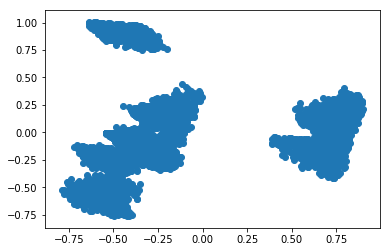

In [16]:
# imprimindo os componentes principais 1 e 2
plt.scatter(df_pca['PC1'],df_pca['PC2'])

- É possível notar alguns agrupamentos de dados. Temos claramente minimamente 3 clusters, mas aparentemente seria possível segregar melhor em mais alguns *clusters*. Devido à perda de informação, não conseguimos analisar mais a fundo estes *clusters* por meio do PCA.

### Clusterizando os Dados

- Vamos tentar clusterizar os dados com os dois principais métodos utlizados, o KMeans e o DBScan. Para entender qual método apresenta o melhor resultado, vamos comparar o *shilhouette score* final de cada um dos métodos.

#### KMeans:

In [17]:
# aux var para entender qtd ideal de clusters
scores = []

# for para testar qtd ideal de clusters - testar de 2 a 15 clusters
for i in tqdm(range(2,16)):
    kmeans = KMeans(n_clusters=i).fit(df)
       
    # anexa o valor do silhouette_score
    scores.append(silhouette_score(df.values, kmeans.labels_, metric='euclidean'))

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [02:00<00:00,  8.64s/it]


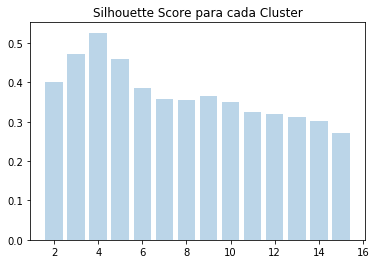

In [18]:
# Visualizando qtd de Clusters pelo K-Means

plt.figure(1)
plt.bar(range(2,16), scores, align='center', alpha = 0.3)
plt.title('Silhouette Score para cada Cluster')
plt.show()

- Com a clusterização via KMeans, vemos que a quantidade ideal de clusters é 4. O *silhouette score* obtido é de, aproximadamente, 0.53. Vamos clusterizar em 4 clusters e imprimir com o PCA:

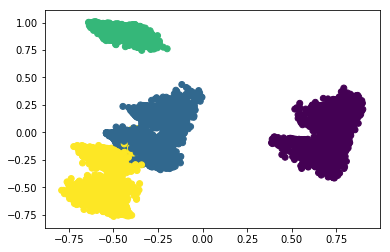

In [28]:
# Visualizando a Clusterização com o KMeans

kmeans = KMeans(n_clusters=4).fit(df)
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=kmeans.labels_);

- Podemos notar que a clusterização via KMeans fez sentido, ao menos se visualizada pelos 2 componentes principais. O silhouette score é de:

In [20]:
silhouette_score(df.values, kmeans.labels_, metric='euclidean')

0.5261012144319994

#### DBScan:

- Para realizar a clusterização com DBScan, primeiramente precisamos ter uma noção do valor do epsilon. Para tanto

In [21]:
#Selecionando o melhor valor para o eps
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

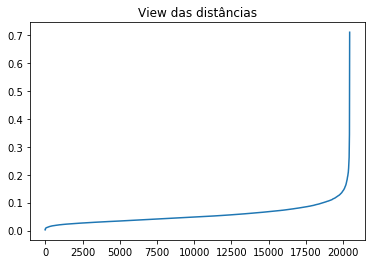

In [22]:
distances = np.sort(distances, axis=0)

distances = distances[:,1]
plt.plot(distances)
plt.title('View das distâncias')
plt.show()

- Aparentemente, o epsilon de 0.15 é o ideal para este problema, dado ser o limite antes da explosão. Agora, vamos explorar a quantidade mínima de amostras, também considerando o *silhouette score* como parâmetro de qualidade da clusterização:

In [23]:
# aux var para entender a qtd mínima de amostras
scores = []

# for para testar qtd ideal mínima de amostras
for i in tqdm(range(2,15)):
    db = DBSCAN(eps=0.2, min_samples=i).fit(df)
    # anexa o valor do silhouette_score
    scores.append(silhouette_score(df, db.labels_))

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [03:33<00:00, 16.40s/it]


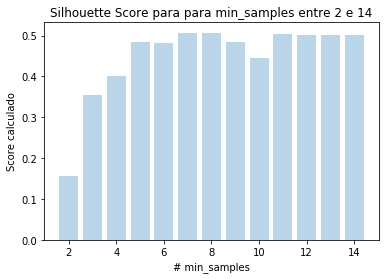

In [27]:
# Visualizando o Silhouette Score pela quantidade de amostras

plt.figure()
plt.bar(range(2,15), scores, align='center', alpha = 0.3)
plt.title('Silhouette Score para para min_samples entre 2 e 14')
plt.xlabel('# min_samples')
plt.ylabel('Score calculado')
plt.show()

- Vemos que, pelo DBScan, a quantidade ideal de amostras é 7. Visualizando os dados clusterizados desta forma no PCA:

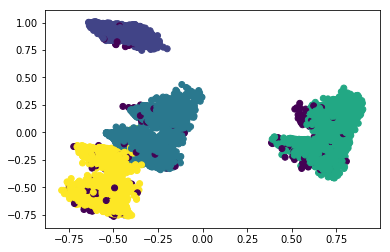

In [29]:
db = DBSCAN(eps=0.2, min_samples=7).fit(df)
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=db.labels_);

In [42]:
print('Labels: ', Counter(list(db.labels_)).keys())
print('Totais: ', Counter(list(db.labels_)).values())

Labels:  dict_keys([0, -1, 1, 2, 3, 4])
Totais:  dict_values([2253, 233, 8975, 6401, 109, 2462])


- Vemos que pelo método do DBScan, a quantidade de clusters é 5, além dos resíduos.

- Comparando os resultados obtidos com os métodos do KMeans e do DBScan, temos o desempenho um pouco mais vantajoso do KMeans, com o *shilhouette score* de cerca de 0.53, enquanto que com o DBScan obtivemos cerca de 0.51. Além disto, visualmente, a classificação fez mais sentido com o KMeans (embora haja o fator da perda de informação devida à redução de dimensionalidade). **Desta forma, optamos por fazer a clusterização com o KMeans**:

In [17]:
# criando coluna do cluster no dataframe:
kmeans = KMeans(n_clusters=4).fit(df)
df['cluster'] = kmeans.labels_

In [18]:
df.cluster.value_counts()

1    9039
0    6496
3    2628
2    2270
Name: cluster, dtype: int64

### Classificador

- Vamos agora criar um classificador para novos dados, que classifique em uma das 4 classes do dataframe criadas pelo KMeans.
- Primeiramente, vamos testar os principais classificadores (KNN, Naive Bayes, Árvore de Decisão e SVM) em sua configuração padrão, e obter o de melhor acurácia, dado que não há grande desbalanceamento entre as classes observadas. Após selecionar o melhor modelo, faremos o *tunning* dos parâmetros para obter o melhor modelo possível.

#### Divisão dos Dados em Treino e Teste:

In [19]:
X = df[df.columns[:13]]
y = df[df.columns[13]]

In [20]:
# mantendo 30% dos dados segregados para teste e 70% para treino:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)

#### KNN:

- Treinando o modelo:

In [28]:
# Treina o Modelo

KNN_classifier = KNeighborsClassifier()
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier()

- Avaliando o modelo:

In [29]:
# faz as predições
y_pred = KNN_classifier.predict(X_test)

# imprime a acurácia:
print('Acurácia do Modelo: ', accuracy_score(y_test, y_pred))

Acurácia do Modelo:  1.0


- Visualizando a matriz de confusão:

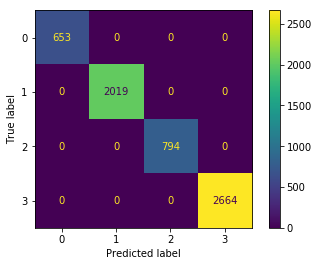

In [30]:
plot_confusion_matrix(KNN_classifier, X_test, y_test);

- Estranhamente, a acurácia do modelo foi de 100%, sem errar uma classificação sequer. Isto é extremamente raro em ML. Vamos comparar com o desempenho dos demais modelos a seguir e ver se temos situação similar.

#### Naive Bayes:

- Treinando o modelo:

In [83]:
# Treina o Modelo
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

- Avaliando o modelo:

In [84]:
# faz as predições
y_pred = nb_classifier.predict(X_test)

# imprime a acurácia:
print('Acurácia do Modelo: ', accuracy_score(y_test, y_pred))

Acurácia do Modelo:  1.0


- Visualizando a matriz de confusão:

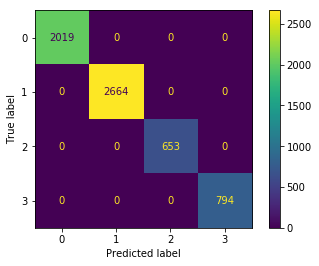

In [87]:
plot_confusion_matrix(nb_classifier, X_test, y_test);

- Da mesma forma que para o caso do KNN, a acurácia do modelo foi de 100%, sem errar uma classificação sequer.

#### Árvore de Decisão:

- Treinando o modelo:

In [89]:
# treina o modelo
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

- Avaliando o modelo:

In [94]:
# faz as predições
y_pred = tree_classifier.predict(X_test)

# imprime a acurácia:
print('Acurácia do Modelo: ', accuracy_score(y_test, y_pred))

Acurácia do Modelo:  1.0


- Visualizando a matriz de confusão:

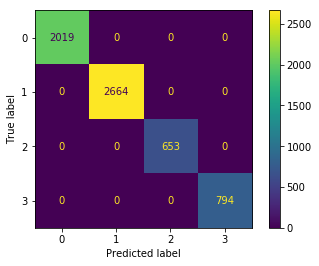

In [95]:
plot_confusion_matrix(tree_classifier, X_test, y_test);

- Da mesma forma que os classificadores anteriores, a acurácia foi 100%.

#### SMV

- Treinando o modelo

In [97]:
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)

SVC()

- Avaliando o modelo

In [99]:
# faz as predições
y_pred = svc_classifier.predict(X_test)

# imprime a acurácia:
print('Acurácia do Modelo: ', accuracy_score(y_test, y_pred))

Acurácia do Modelo:  1.0


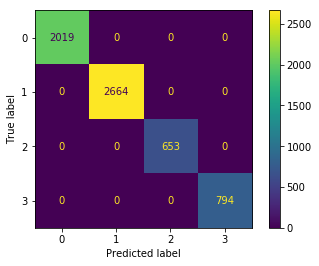

In [100]:
plot_confusion_matrix(svc_classifier, X_test, y_test);

- Também foi obtido um modelo com 100% de acurácia

#### Conclusão:

Dado que todos os modelos treinados tiveram 100% de acurácia, não foi necessário fazer o *tunning* dos hiperparâmetros. Também, uma vez que todos os modelos tiveram igual desempenho, optaríamos, caso necessário, por utilizar o **classificador Naive Bayes**, que é bastante leve rápido.

### Regressor

- O exercício solicitou a criação de um regressor a partir da variável V2. Vamos adotar a mesma estratégia que para os classificadores: treinar os principais modelos sem definição de parâmetros e, com o melhor regressor, fazer o *tunning* dos parâmetros, para buscar o melhor regressor possível. Vamos procurar otimizar o RMSE (Raiz do Erro Médio Quadrático)
- Porém, primeiramente é necessário segregar novamente os dados em treino e teste, dado que a variável target passa a ser outra, e a escala da mesma foi reduzida.

#### Tratamento dos Dados

- Primeiramente, vamos selecionar as *features* e armazená-las em uma variável chamada *X_regressor*. Quanto à variável *target*, vamos resgatar o valor original da mesma, que foi armazenada em uma variável chamada *V2_orig*

In [17]:
X_regressor = df[['V1', 'V3', 'V4', 'V5', 'V7', 'V8', 'V9', 'V10', 'V6_B', 'V6_C', 'V6_D', 'V6_E']]
y_regressor = V2_orig

#### Divisão dos Dados em Treino e Teste

In [18]:
# mantendo 30% dos dados segregados para teste e 70% para treino:
X_train, X_test, y_train, y_test = train_test_split(X_regressor, y_regressor, 
                                                    test_size = .3, random_state=42)

#### Treino dos Regressores

In [19]:
# cria diversos pipelines com os principais regressores
pipelines = []
pipelines.append(('LR', Pipeline([('LR', LinearRegression())])))
pipelines.append(('RD', Pipeline([('RD', Ridge())])))
pipelines.append(('LS', Pipeline([('LS', Lasso())])))
pipelines.append(('EL', Pipeline([('EL', ElasticNet())])))
pipelines.append(('KNN', Pipeline([('KNN', KNeighborsRegressor())])))
pipelines.append(('DTR', Pipeline([('DTR', DecisionTreeRegressor())])))
pipelines.append(('RF', Pipeline([('RF', RandomForestRegressor())])))
pipelines.append(('ADA', Pipeline([('ADA', AdaBoostRegressor())])))
pipelines.append(('SVR', Pipeline([('SVR', SVR())])))

# listas para medir os resultados - vamos usar 5 folds
results = []
names = []

# 5 folds para cross validation
num_folds = 5
seed = 42
RMSE = 'neg_root_mean_squared_error'

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=RMSE)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -79949.282748 (2532.423296)
RD: -80113.972562 (1648.961747)
LS: -79944.514676 (2510.268551)
EL: -106451.399984 (1938.549311)
KNN: -67273.818755 (985.475220)
DTR: -71029.078926 (1263.589526)
RF: -50450.630468 (1046.073657)
ADA: -88600.439596 (3900.264948)
SVR: -117965.097825 (1882.785701)


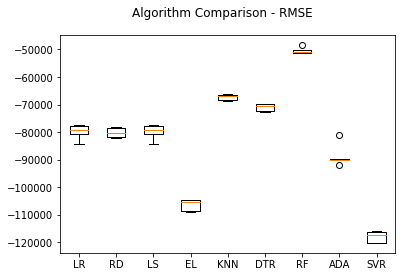

In [20]:
# Comparando os Algorítimos
fig = plt.figure()
fig.suptitle('Algorithm Comparison - RMSE')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

- Vemos que o melhor regressor, nas configurações padrão, foi o Random Forest Regressor (RF), com um RMSE médio de 50k, consideravelmente melhor que o KNN, que obteve o segundo melhor desempenho. O desvio padrão obtido foi um pouco acima para o RF, mas próximo. Desta forma, vamos tentar **otimizar o RF para chegarmos no melhor regressor possível**
- Para tanto, vamos vamos utilizar o GridSearch, e buscar a melhor combinação de parâmetros para o Regressor Random Forest

In [21]:
scoring='neg_root_mean_squared_error'

parameters = {'n_estimators':[100,300], 
              'max_depth':[None, 5, 10],
              'min_samples_split':[2,4],
             }
rfr = RandomForestRegressor()
clf = GridSearchCV(estimator=rfr, 
                   param_grid=parameters,
                   cv=3,
                   scoring=scoring,
                   n_jobs=-1,
                   verbose=3
                  )
clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  2.2min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 300]},
             scoring='neg_root_mean_squared_error', verbose=3)

- O melhor estimador que obtivemos foi

In [23]:
clf.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

- E seu score, baseado no *cross validation*:

In [24]:
clf.best_score_

-51270.529091541655

- Vemos que o resultado foi bastante próximo do já obtido com os valores padrão do Regressor Random Forest. Para medirmos nos dados de teste:

In [30]:
RMSE_teste = math.sqrt(mean_squared_error(y_test, clf.predict(X_test)))
print(RMSE_teste)

49459.80726858921


- Vemos que o RMSE é próximo dos valores obtidos para treino, o que é bom. Para termos uma melhor ideia de o quanto este valor realmente é próximo dos valores reais, uma vez que o RMSE está na mesma base que os dados de teste, podemos compará-los. Vamos comparar com o valor médio dos dados de teste:

In [32]:
1 - RMSE_teste/y_test.mean()

0.7597702592975192

- Ou seja, o RMSE dos dados preditos é cerca de 75% próximo do **valor médio** dos dados reais.

- Se plotarmos visualmente, com os dados reais no eixo X e os dados preditos no eixo Y:

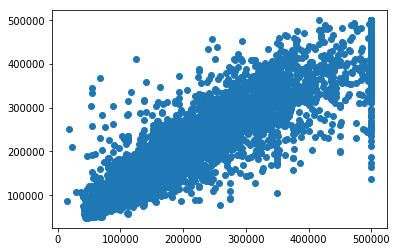

In [37]:
plt.scatter(y_test, clf.predict(X_test));

- Caso a predição fosse perfeita, teríamos uma linha diagonal entre os dados reais e preditos. Como esperado, os dados apresentam uma variação, mas é possível observar o comportamento diagonal citado.